# Scikit-learn intro

## Get the data

In [1]:
import pandas as pd

In [2]:
iris_data = pd.read_csv("iris.csv", names = ["sepal_l", "sepal_w", "petal_l", "petal_w", "class"])

## Explore the data

In [3]:
iris_data.shape

(150, 5)

In [4]:
print(iris_data[:5])

   sepal_l  sepal_w  petal_l  petal_w        class
0      5.1      3.5      1.4      0.2  Iris-setosa
1      4.9      3.0      1.4      0.2  Iris-setosa
2      4.7      3.2      1.3      0.2  Iris-setosa
3      4.6      3.1      1.5      0.2  Iris-setosa
4      5.0      3.6      1.4      0.2  Iris-setosa


In [5]:
iris_data[:5]

,sepal_l,sepal_w,petal_l,petal_w,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris_data.describe()

,sepal_l,sepal_w,petal_l,petal_w
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


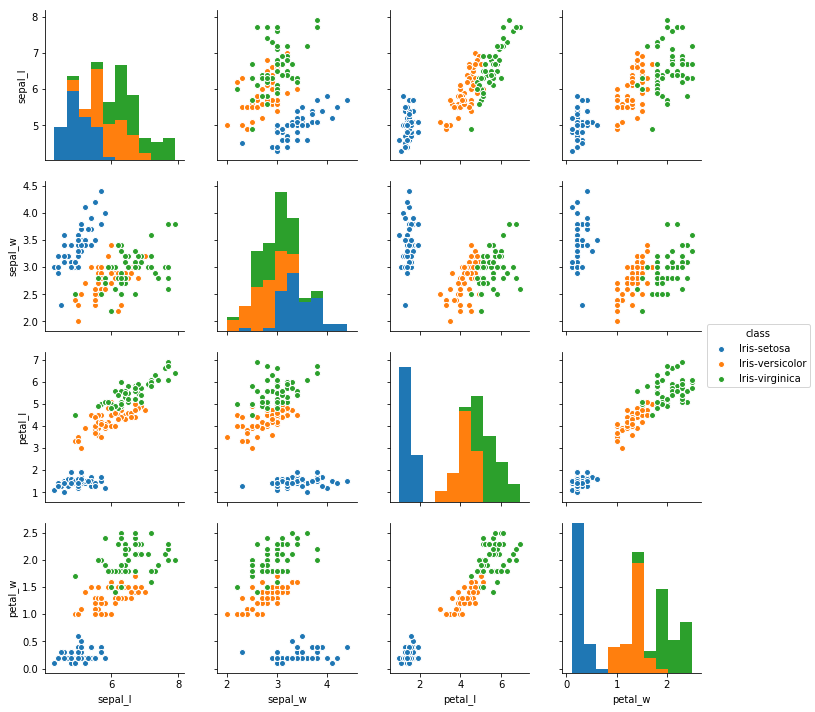

In [8]:
import seaborn as sns
pair_plot = sns.pairplot(iris_data, hue="class")


## Separate the data into X (features) and y (target)

In [9]:

# Get X and y
X = iris_data[["sepal_l", "sepal_w", "petal_l", "petal_w"]].values

# Transform 'Iris-virginica' to be the positive class (binary classification)
y = iris_data['class'].map({"Iris-setosa":0, 'Iris-versicolor':1, 'Iris-virginica': 2}).values

In [10]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [11]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

## Split the data into train and test sets

In [29]:
from sklearn.model_selection import train_test_split

# split dataset into test/train  using All features
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

In [30]:
X_train.shape, X_test.shape

((105, 4), (45, 4))

# Algorithms
##  Create and evaluate some models

### Logistic Regression

In [31]:
# binary classifier
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.predict(X_test)

array([0, 1, 1, 0, 2, 2, 2, 0, 0, 2, 1, 0, 2, 1, 2, 0, 1, 2, 0, 0, 1, 2,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2,
       1], dtype=int64)

In [32]:
log_reg.score(X_test, y_test)

0.8888888888888888

In [33]:
y_test = log_reg.predict(X_test)

In [34]:
y_test

array([0, 1, 1, 0, 2, 2, 2, 0, 0, 2, 1, 0, 2, 1, 2, 0, 1, 2, 0, 0, 1, 2,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2,
       1], dtype=int64)

### Support Vector Machine

In [36]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
#svm = SVC(kernel='rbf', C=1)
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.8888888888888888

In [37]:
svm.predict(X_test)

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2,
       1], dtype=int64)

In [38]:
svm.score(X_test, y_test)

0.8888888888888888

### Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.8888888888888888

### K-nearest Neighbors

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.8666666666666667